In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in the original FBI hate crime statistical dataset

In [13]:
df = pd.read_csv("hate_crime.csv")

In [14]:
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226323,1445214,2021,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Lesbian (Female),Individual,S,S
226324,1445630,2021,WY0070200,Riverton,NaN,City,WY,Wyoming,Mountain,West,...,Not Specified,Not Specified,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
226325,1448544,2021,WY0190100,Green River,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Government/Public Building,Anti-American Indian or Alaska Native,Individual,S,S
226326,1448545,2021,WY0150000,Park,NaN,County,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Mental Disability,Individual,S,S


In [15]:
df.keys()

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

### Preprocess the DataFrame and Clean the Data

Filter only 2020 racial hate crimes as corresponding to my twitter dataset and google dataset

In [16]:
df = df.loc[df['data_year'] == 2020]
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
209171,864279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,2,Arson;Burglary/Breaking & Entering,NaN,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,M,S
209172,893434,2020,AK0010200,Fairbanks,NaN,City,AK,Alaska,Pacific,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Government/Public Building,Anti-Transgender,Individual,S,S
209173,1052479,2020,AK0010300,Juneau,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-American Indian or Alaska Native,Individual,S,S
209174,1054279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Sexual Assault With An Object,1.0,Park/Playground,Anti-Female,Individual,S,S
209175,1054280,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,American Indian or Alaska Native,Not Hispanic or Latino,1,Aggravated Assault,1.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219020,1440762,2020,WY0170000,Sheridan,NaN,County,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,Anti-Native Hawaiian or Other Pacific Islander,Individual,S,S
219021,1441769,2020,WY0170100,Sheridan,NaN,City,WY,Wyoming,Mountain,West,...,Not Specified,Not Specified,1,Simple Assault,1.0,Bar/Nightclub,Anti-American Indian or Alaska Native,Individual,S,S
219022,1442136,2020,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Female,Individual,S,S
219023,1444656,2020,WY0210100,Evanston,NaN,City,WY,Wyoming,Mountain,West,...,Black or African American,Not Hispanic or Latino,1,Aggravated Assault,1.0,Residence/Home,Anti-White,Individual,S,S


In [17]:
# Change the type of incident_date from string to datetime
df['incident_date'] = pd.to_datetime(df['incident_date'])

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_85758/3441731086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['incident_date'] = pd.to_datetime(df['incident_date'])


In [18]:
# Observe the content of each hate crime incident, what features and information are documented?
df.iloc[0]

incident_id                                                 864279
data_year                                                     2020
ori                                                      AK0010100
pug_agency_name                                          Anchorage
pub_agency_unit                                                NaN
agency_type_name                                              City
state_abbr                                                      AK
state_name                                                  Alaska
division_name                                              Pacific
region_name                                                   West
population_group_code                                           1C
population_group_description      Cities from 250,000 thru 499,999
incident_date                                  2020-01-24 00:00:00
adult_victim_count                                             NaN
juvenile_victim_count                                         

Drop irrelevant columns in the DataFrame

In [19]:
df = df.drop(['ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr', 'population_group_code',
              'adult_victim_count', 'juvenile_victim_count', 'adult_offender_count', 'juvenile_offender_count'], axis=1)

In [20]:
df.iloc[0]

incident_id                                                 864279
data_year                                                     2020
state_name                                                  Alaska
division_name                                              Pacific
region_name                                                   West
population_group_description      Cities from 250,000 thru 499,999
incident_date                                  2020-01-24 00:00:00
total_offender_count                                             0
offender_race                                              Unknown
offender_ethnicity                                         Unknown
victim_count                                                     2
offense_name                    Arson;Burglary/Breaking & Entering
total_individual_victims                                       NaN
location_name                       Church/Synagogue/Temple/Mosque
bias_desc                                     Anti-Other Chris

Reorganize the columns in the DataFrame according to importance

In [21]:
df = df.reindex(columns=['incident_id', 'incident_date', 'bias_desc', 'offense_name', 
                         'offender_race', 'offender_ethnicity', 'total_offender_count', 'victim_count',
                         'location_name', 'data_year', 'division_name', 'region_name', 'population_group_description', 
                         'total_individual_victims', 'victim_types', 'multiple_offense', 'multiple_bias'])
df

,incident_id,incident_date,bias_desc,offense_name,offender_race,offender_ethnicity,total_offender_count,victim_count,location_name,data_year,division_name,region_name,population_group_description,total_individual_victims,victim_types,multiple_offense,multiple_bias
209171,864279,2020-01-24,Anti-Other Christian,Arson;Burglary/Breaking & Entering,Unknown,Unknown,0,2,Church/Synagogue/Temple/Mosque,2020,Pacific,West,"Cities from 250,000 thru 499,999",NaN,Religious Organization,M,S
209172,893434,2020-01-03,Anti-Transgender,Aggravated Assault,White,Not Hispanic or Latino,1,1,Government/Public Building,2020,Pacific,West,"Cities from 25,000 thru 49,999",1.0,Individual,S,S
209173,1052479,2020-05-04,Anti-American Indian or Alaska Native,Aggravated Assault,Unknown,Unknown,0,1,Parking/Drop Lot/Garage,2020,Pacific,West,"Cities from 25,000 thru 49,999",1.0,Individual,S,S
209174,1054279,2020-06-01,Anti-Female,Sexual Assault With An Object,Unknown,Unknown,1,1,Park/Playground,2020,Pacific,West,"Cities from 250,000 thru 499,999",1.0,Individual,S,S
209175,1054280,2020-06-21,Anti-Black or African American,Aggravated Assault,American Indian or Alaska Native,Not Hispanic or Latino,1,1,Hotel/Motel/Etc.,2020,Pacific,West,"Cities from 250,000 thru 499,999",1.0,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219020,1440762,2020-12-05,Anti-Native Hawaiian or Other Pacific Islander,Simple Assault,White,Not Hispanic or Latino,1,1,Jail/Prison/Penitentiary/Corrections Facility,2020,Mountain,West,"Non-MSA counties from 10,000 thru 24,999",1.0,Individual,S,S
219021,1441769,2020-11-07,Anti-American Indian or Alaska Native,Simple Assault,Not Specified,Not Specified,0,1,Bar/Nightclub,2020,Mountain,West,"Cities from 10,000 thru 24,999",1.0,Individual,S,S
219022,1442136,2020-05-10,Anti-Female,Simple Assault,White,Not Hispanic or Latino,1,1,Residence/Home,2020,Mountain,West,"Cities from 2,500 thru 9,999",1.0,Individual,S,S
219023,1444656,2020-10-16,Anti-White,Aggravated Assault,Black or African American,Not Hispanic or Latino,1,1,Residence/Home,2020,Mountain,West,"Cities from 10,000 thru 24,999",1.0,Individual,S,S


Set incident date as index column for time series analysis and sort by date

In [22]:
df = df.set_index('incident_date')
df = df.sort_index()
df

,incident_id,bias_desc,offense_name,offender_race,offender_ethnicity,total_offender_count,victim_count,location_name,data_year,division_name,region_name,population_group_description,total_individual_victims,victim_types,multiple_offense,multiple_bias
incident_date,,,,,,,,,,,,,,,,
2020-01-01,1262512,Anti-Black or African American,Destruction/Damage/Vandalism of Property,Unknown,Unknown,0,1,Restaurant,2020,Pacific,West,"Cities from 25,000 thru 49,999",NaN,Business,S,S
2020-01-01,1438745,Anti-Gay (Male),Intimidation,Black or African American,Not Hispanic or Latino,1,1,Other/Unknown,2020,South Atlantic,South,"Cities from 250,000 thru 499,999",1.0,Individual,S,S
2020-01-01,1346275,Anti-Black or African American,Simple Assault,Unknown,Hispanic or Latino,2,1,Parking/Drop Lot/Garage,2020,Pacific,West,"Cities 1,000,000 or over",1.0,Individual,S,S
2020-01-01,1447667,Anti-Gay (Male),Aggravated Assault,Unknown,Unknown,1,1,Residence/Home,2020,West South Central,South,"Cities from 25,000 thru 49,999",1.0,Individual,S,S
2020-01-01,1437121,Anti-Hindu,Destruction/Damage/Vandalism of Property,Not Specified,Not Specified,0,1,Other/Unknown,2020,Pacific,West,"Cities from 100,000 thru 249,999",1.0,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,1401872,Anti-Physical Disability,All Other Larceny,Unknown,Unknown,2,1,Specialty Store,2020,West South Central,South,"Cities from 50,000 thru 99,999",1.0,Individual,S,S
2020-12-31,1447103,Anti-Black or African American,Aggravated Assault,Not Specified,Not Specified,0,3,Residence/Home,2020,South Atlantic,South,"MSA counties from 25,000 thru 99,999",3.0,Individual,S,S
2020-12-31,1442167,Anti-Catholic,Destruction/Damage/Vandalism of Property,Unknown,Unknown,1,1,Department/Discount Store,2020,Mountain,West,"Cities from 250,000 thru 499,999",0.0,Business,S,S


Filter anti-Asian hate crimes

In [23]:
df_asian = df[df['bias_desc'].str.contains('Asian')]
df_asian

,incident_id,bias_desc,offense_name,offender_race,offender_ethnicity,total_offender_count,victim_count,location_name,data_year,division_name,region_name,population_group_description,total_individual_victims,victim_types,multiple_offense,multiple_bias
incident_date,,,,,,,,,,,,,,,,
2020-01-01,1438195,Anti-Asian,Destruction/Damage/Vandalism of Property;Intim...,White,Not Hispanic or Latino,1,2,Convenience Store,2020,Mountain,West,"Cities under 2,500",1.0,Individual,M,S
2020-01-03,1438405,Anti-Asian,Destruction/Damage/Vandalism of Property,Not Specified,Not Specified,0,2,Convenience Store,2020,Pacific,West,"Cities from 500,000 thru 999,999",1.0,Business;Individual,S,S
2020-01-09,1436600,Anti-Asian,Intimidation,White,Not Hispanic or Latino,1,1,Industrial Site,2020,East South Central,South,"Cities from 25,000 thru 49,999",1.0,Individual,S,S
2020-01-11,1327148,Anti-Asian,Simple Assault,White,Unknown,1,1,Highway/Road/Alley/Street/Sidewalk,2020,South Atlantic,South,"Cities from 500,000 thru 999,999",1.0,Individual,S,S
2020-01-11,1442668,Anti-Asian,Intimidation,Black or African American,Not Hispanic or Latino,1,1,Residence/Home,2020,West South Central,South,"MSA counties 100,000 or over",1.0,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,1441462,Anti-Asian,Simple Assault,Unknown,Unknown,1,1,Convenience Store,2020,Pacific,West,"Cities from 100,000 thru 249,999",1.0,Individual,S,S
2020-12-23,1346443,Anti-Asian,Robbery,Unknown,Hispanic or Latino,3,2,Highway/Road/Alley/Street/Sidewalk,2020,Pacific,West,"Cities from 50,000 thru 99,999",2.0,Individual,S,S
2020-12-24,1262483,Anti-Asian,Simple Assault,White,Hispanic or Latino,1,1,Highway/Road/Alley/Street/Sidewalk,2020,Pacific,West,"Cities from 25,000 thru 49,999",1.0,Individual,S,S


### Calculate and visualize the trends for both overall racial hate crimes and anti-Asian hate crimes

In [24]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
def monthly_count(df):
    ''' 
    Helper function to calculate a given DataFrame's monthly hate crime counts
    '''
    jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for index, _ in df.iterrows():
        num = index.month
        if num == 1:
            jan +=1
        elif num == 2:
            feb += 1
        elif num == 3:
            mar += 1
        elif num == 4:
            apr += 1
        elif num == 5:
            may += 1
        elif num == 6:
            jun += 1
        elif num == 7:
            jul += 1
        elif num == 8:
            aug += 1
        elif num == 9:
            sep += 1
        elif num == 10:
            oct += 1
        elif num == 11:
            nov += 1
        else:
            dec += 1  
    return jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec

In [26]:
# Monthly incidents including all racial hate crimes
jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec = monthly_count(df)
total = jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec
print('Number of hate crimes in each month: ', jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec)
print("Total number of all hate crimes = ", total)

Number of hate crimes in each month:  582 614 619 490 736 1436 1112 1042 926 949 736 612
Total number of all hate crimes =  9854


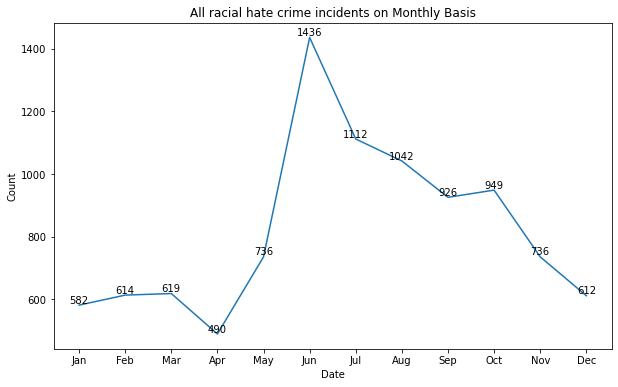

In [27]:
plt.figure(figsize=(10, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
crime_num = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]
plt.plot(months, crime_num)

for i, count in enumerate(crime_num):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title("All racial hate crime incidents on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [28]:
# Monthly incidents of anti-Asian hate crimes
jan_a, feb_a, mar_a, apr_a, may_a, jun_a, jul_a, aug_a, sep_a, oct_a, nov_a, dec_a = monthly_count(df_asian)
total_a = jan_a+feb_a+mar_a+apr_a+may_a+jun_a+jul_a+aug_a+sep_a+oct_a+nov_a+dec_a
print('Numbers of anti-Asian hate crimes in each month:', jan_a, feb_a, mar_a, apr_a, may_a, jun_a, jul_a, aug_a, sep_a, oct_a, nov_a, dec_a)
print("Total number of anti-Asian hate crimes = ", total_a)

Numbers of anti-Asian hate crimes in each month: 18 14 55 50 44 39 26 19 29 26 17 19
Total number of anti-Asian hate crimes =  356


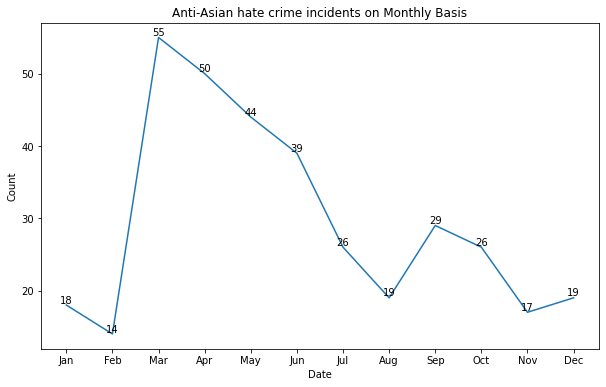

In [29]:
plt.figure(figsize=(10, 6))
crime_num_a = [jan_a, feb_a, mar_a, apr_a, may_a, jun_a, jul_a, aug_a, sep_a, oct_a, nov_a, dec_a]
plt.plot(months, crime_num_a)

for i, count in enumerate(crime_num_a):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title("Anti-Asian hate crime incidents on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

Why the decrease in anti-Asian hate crimes after April -- possibly not labeling anti-asian -- interference in the police side as the high number is consistent in social media hate sentiment

Or because of quanranteen and people simply cannot go out and commit hate crimes; or possibly because people are under quanranteen they are stuck in their house and take it out on the internet

The crime increase on August -- because quaranteen over?

Stop Asian Hate movement? What time period

The initial hate crime might trigger the following explosive increase of hate crimes as the former normalize the latter

What happened in December? Sudden increase in Twitter data

Also refer back to general hate crime data, also share a similar trend 

Consider check anti-other-country

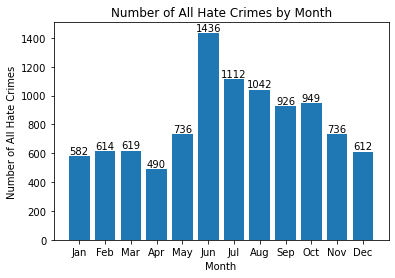

In [30]:
plt.bar(months, crime_num)

plt.title('Number of All Hate Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of All Hate Crimes')

for i in range(len(crime_num)):
    plt.text(i, crime_num[i], crime_num[i], ha='center', va='bottom')

plt.show()

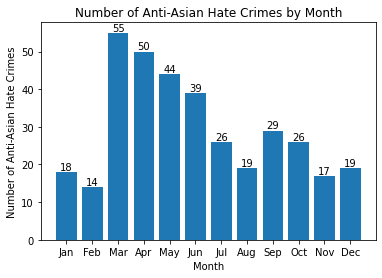

In [31]:
plt.bar(months, crime_num_a)

plt.title('Number of Anti-Asian Hate Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Anti-Asian Hate Crimes')

for i in range(len(crime_num_a)):
    plt.text(i, crime_num_a[i], crime_num_a[i], ha='center', va='bottom')

plt.show()

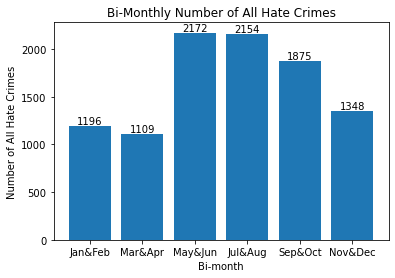

In [32]:
crime_num2 = [jan+feb, mar+apr, may+jun, jul+aug, sep+oct, nov+dec]
bimonths = ['Jan&Feb', 'Mar&Apr', 'May&Jun', 'Jul&Aug', 'Sep&Oct', 'Nov&Dec']
plt.bar(bimonths, crime_num2)

plt.title('Bi-Monthly Number of All Hate Crimes')
plt.xlabel('Bi-month')
plt.ylabel('Number of All Hate Crimes')

for i in range(len(crime_num2)):
    plt.text(i, crime_num2[i], crime_num2[i], ha='center', va='bottom')

plt.show()

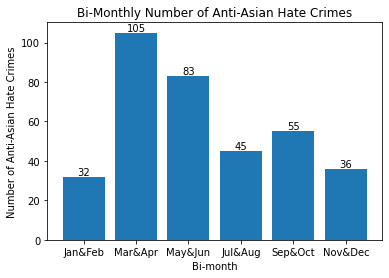

In [33]:
crime_num_a_2 = [jan_a+feb_a, mar_a+apr_a, may_a+jun_a, jul_a+aug_a, sep_a+oct_a, nov_a+dec_a]
plt.bar(bimonths, crime_num_a_2)

plt.title('Bi-Monthly Number of Anti-Asian Hate Crimes')
plt.xlabel('Bi-month')
plt.ylabel('Number of Anti-Asian Hate Crimes')

for i in range(len(crime_num_a_2)):
    plt.text(i, crime_num_a_2[i], crime_num_a_2[i], ha='center', va='bottom')

plt.show()

### Calculate basic summary statistics


In [34]:
monthly_mean = np.mean(crime_num)
monthly_median = np.median(crime_num)
monthly_mode = pd.Series(crime_num).mode()[0]
monthly_std_dev = np.std(crime_num)
monthly_range_min = np.min(crime_num)
monthly_range_max = np.max(crime_num)

print("All Racial Hate Crime Monthly Mean:", monthly_mean)
print("All Racial Hate Crime Monthly Median:", monthly_median)
print("All Racial Hate Crime Monthly Mode:", monthly_mode)
print("All Racial Hate Crime Monthly Standard Deviation:", monthly_std_dev)
print("All Racial Hate Crime Monthly Range (min, max):", (monthly_range_min, monthly_range_max))

All Racial Hate Crime Monthly Mean: 821.1666666666666
All Racial Hate Crime Monthly Median: 736.0
All Racial Hate Crime Monthly Mode: 736
All Racial Hate Crime Monthly Standard Deviation: 265.7727203625099
All Racial Hate Crime Monthly Range (min, max): (490, 1436)


In [35]:
monthly_mean_a = np.mean(crime_num_a)
monthly_median_a = np.median(crime_num_a)
monthly_mode_a = pd.Series(crime_num_a).mode()[0]
monthly_std_dev_a = np.std(crime_num_a)
monthly_range_min_a = np.min(crime_num_a)
monthly_range_max_a = np.max(crime_num_a)

print("Anti-Asian Racial Hate Crime Monthly Mean:", monthly_mean_a)
print("Anti-Asian Racial Hate Crime Monthly Median:", monthly_median_a)
print("Anti-Asian Racial Hate Crime Monthly Mode:", monthly_mode_a)
print("Anti-Asian Racial Hate Crime Monthly Standard Deviation:", monthly_std_dev_a)
print("Anti-Asian Racial Hate Crime Monthly Range (min, max):", (monthly_range_min_a, monthly_range_max_a))

Anti-Asian Racial Hate Crime Monthly Mean: 29.666666666666668
Anti-Asian Racial Hate Crime Monthly Median: 26.0
Anti-Asian Racial Hate Crime Monthly Mode: 19
Anti-Asian Racial Hate Crime Monthly Standard Deviation: 13.368703086770317
Anti-Asian Racial Hate Crime Monthly Range (min, max): (14, 55)


### Time Series Analysis

<b>Convert the number of overall racial hate crimes and anti-Asian hate crimes into time series objects</b>

In [36]:
# Check if the date columns are already datetime type
print("Overall hate crime index type: ", type(df.index))
print("Anti-Asian hate crime index type: ", type(df_asian.index))

Overall hate crime index type:  <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Anti-Asian hate crime index type:  <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [37]:
print(crime_num)   # list of monthly counts of all racial hate crimes
print(crime_num_a) # list of monthly counts of anti-Asian hate crimes

[582, 614, 619, 490, 736, 1436, 1112, 1042, 926, 949, 736, 612]
[18, 14, 55, 50, 44, 39, 26, 19, 29, 26, 17, 19]


In [38]:
# Create 2 time series objects for all-racial hate crimes and anti-Asian hate crimes
date_range = pd.date_range(start='1/1/2020', end='12/1/2020', freq='MS')

crime_ts = pd.Series(crime_num, index=date_range)
crime_a_ts = pd.Series(crime_num_a, index=date_range)

In [39]:
print(crime_ts)
print(crime_a_ts)

2020-01-01     582
2020-02-01     614
2020-03-01     619
2020-04-01     490
2020-05-01     736
2020-06-01    1436
2020-07-01    1112
2020-08-01    1042
2020-09-01     926
2020-10-01     949
2020-11-01     736
2020-12-01     612
Freq: MS, dtype: int64
2020-01-01    18
2020-02-01    14
2020-03-01    55
2020-04-01    50
2020-05-01    44
2020-06-01    39
2020-07-01    26
2020-08-01    19
2020-09-01    29
2020-10-01    26
2020-11-01    17
2020-12-01    19
Freq: MS, dtype: int64


<b>Visualize 2 time series objects</b>

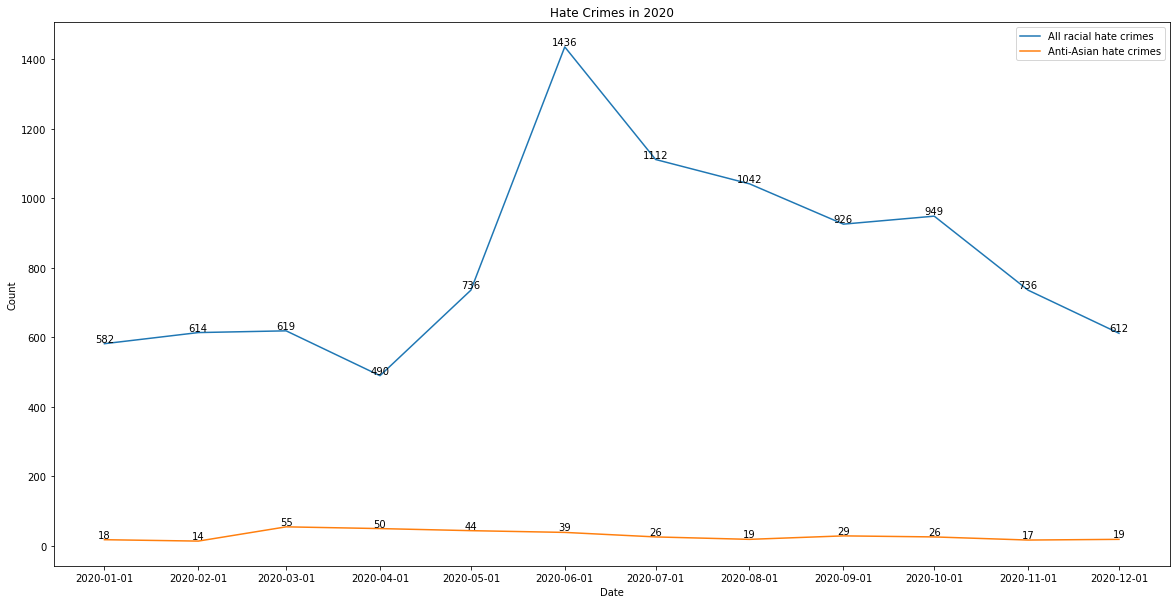

In [40]:
plt.figure(figsize=(20, 10))
plt.plot(crime_ts, label='All racial hate crimes')
plt.plot(crime_a_ts, label='Anti-Asian hate crimes')

for i, value in enumerate(crime_ts):
    plt.text(crime_ts.index[i], value, str(value), ha='center', va='bottom')

for i, value in enumerate(crime_a_ts):
    plt.text(crime_a_ts.index[i], value, str(value), ha='center', va='bottom')

plt.xticks(crime_ts.index.strftime('%Y-%m'))
plt.title('Hate Crimes in 2020')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

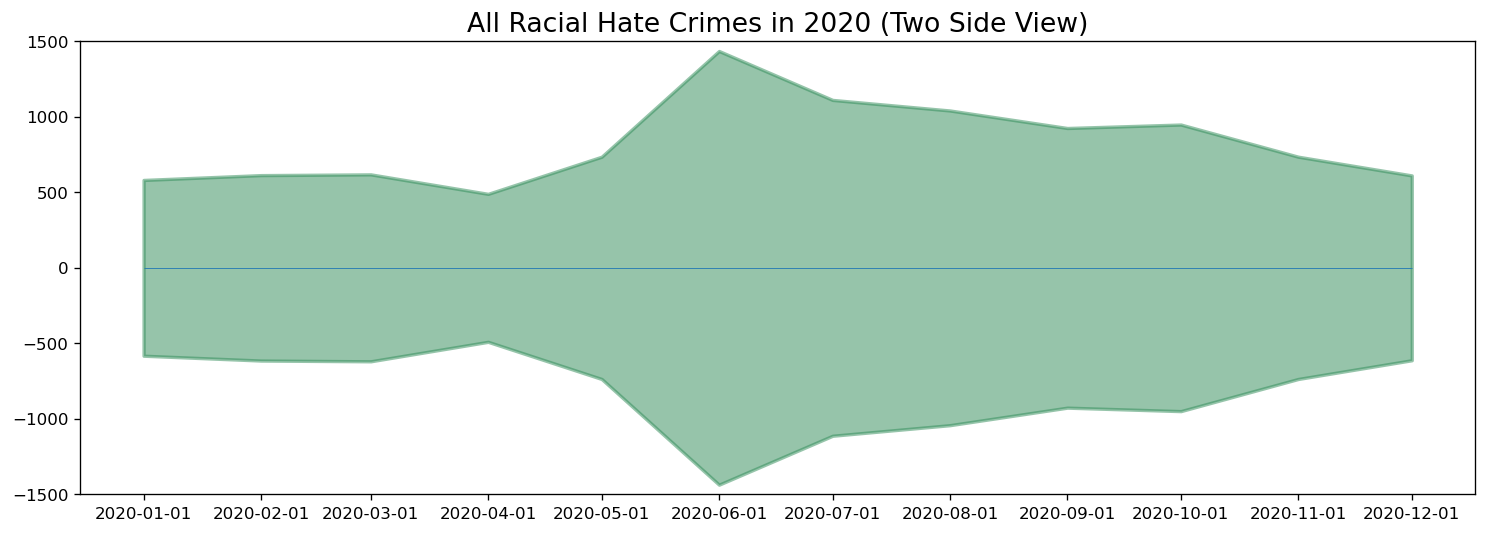

In [41]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(15,5), dpi= 120)
y1 = crime_ts.values
x = crime_ts.index
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-1500, 1500)
plt.xticks(x.strftime('%Y-%m'))
plt.title('All Racial Hate Crimes in 2020 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

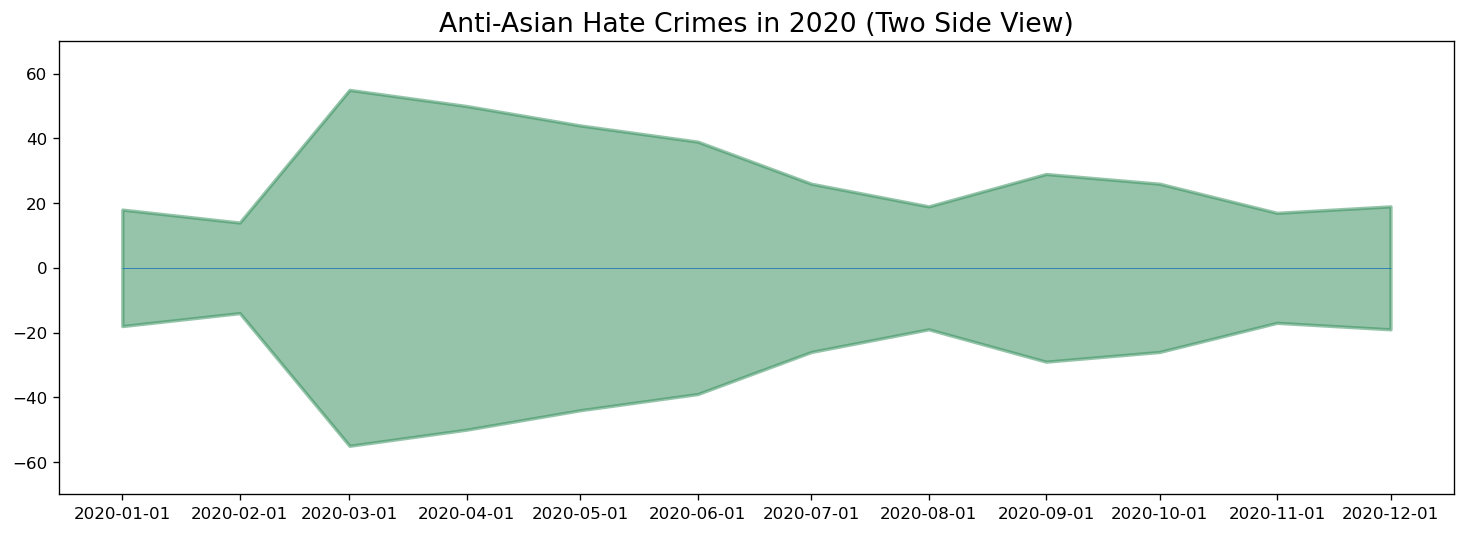

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(15,5), dpi= 120)
y1 = crime_a_ts.values
x = crime_a_ts.index
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-70, 70)
plt.xticks(x.strftime('%Y-%m'))
plt.title('Anti-Asian Hate Crimes in 2020 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

<b>Check for stationarity</b>

In [43]:
from statsmodels.tsa.stattools import adfuller

# Conduct Dickey-Fuller test on the crime_ts time series
result = adfuller(crime_ts)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -2.5006405501160502
p-value: 0.11531854978132944
The time series is not stationary.


In [44]:
# Conduct Dickey-Fuller test on the crime_ts time series
result_a = adfuller(crime_a_ts)

print('ADF Statistic:', result_a[0])
print('p-value:', result_a[1])

if result[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -1.2583284824394358
p-value: 0.6480150542089074
The time series is not stationary.


In [46]:
# Since from the above test my time series are not stationary, 
# I will difference the time series to make them stationary

crime_ts_diff = crime_ts.diff().dropna()
print(crime_ts_diff)

crime_a_ts_diff = crime_a_ts.diff().dropna()
print(crime_a_ts_diff)

2020-02-01     32.0
2020-03-01      5.0
2020-04-01   -129.0
2020-05-01    246.0
2020-06-01    700.0
2020-07-01   -324.0
2020-08-01    -70.0
2020-09-01   -116.0
2020-10-01     23.0
2020-11-01   -213.0
2020-12-01   -124.0
Freq: MS, dtype: float64
2020-02-01    -4.0
2020-03-01    41.0
2020-04-01    -5.0
2020-05-01    -6.0
2020-06-01    -5.0
2020-07-01   -13.0
2020-08-01    -7.0
2020-09-01    10.0
2020-10-01    -3.0
2020-11-01    -9.0
2020-12-01     2.0
Freq: MS, dtype: float64


In [47]:
# After difference, check stationary again
result_2 = adfuller(crime_ts_diff)

print('ADF Statistic:', result_2[0])
print('p-value:', result_2[1])

if result_2[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -2.9417894430564067
p-value: 0.0406998120939811
The time series is stationary.


In [48]:
result_2_a = adfuller(crime_a_ts_diff)

print('ADF Statistic:', result_2_a[0])
print('p-value:', result_2_a[1])

if result_2_a[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -3.159126818073189
p-value: 0.02247586864965483
The time series is stationary.


Now I have 2 stationary time series, proceed into the next step -- ARIMA model

Notice that since I differenced once and got stationary time series, d=1

First find q and p using ACF and PACF

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


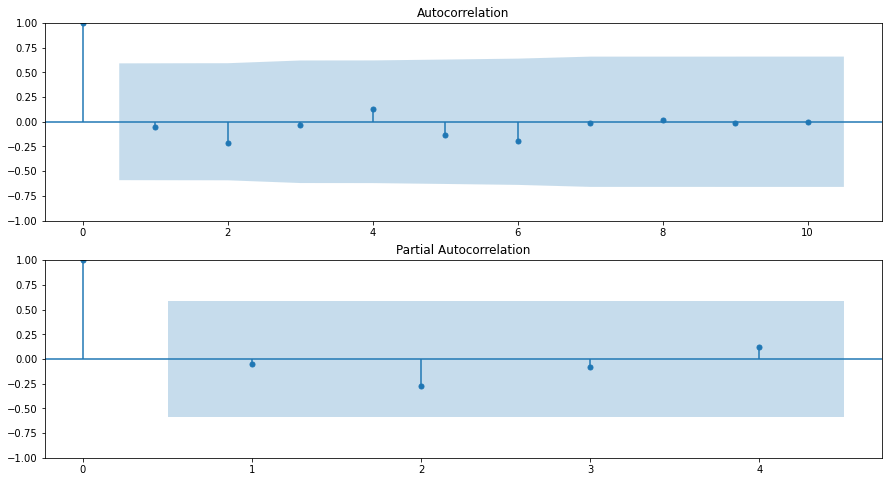

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(15,8))
plot_acf(crime_ts_diff, ax=ax[0], lags=10)
plot_pacf(crime_ts_diff, ax=ax[1], lags=4)
plt.show()

Based on the above ACF and PACF plot, q=3 and p=1

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# fit ARIMA model with p=1, d=1, q=3
model = ARIMA(crime_ts_diff, order=(1, 1, 3))
model_fit = model.fit()

# make predictions for the next 6 months
forecast = model_fit.forecast(steps=6)

# print the forecasted values
print(forecast)

2021-01-01    28.895002
2021-02-01    35.995933
2021-03-01    26.403655
2021-04-01    19.982547
2021-05-01    15.684231
2021-06-01    12.806922
Freq: MS, Name: predicted_mean, dtype: float64


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


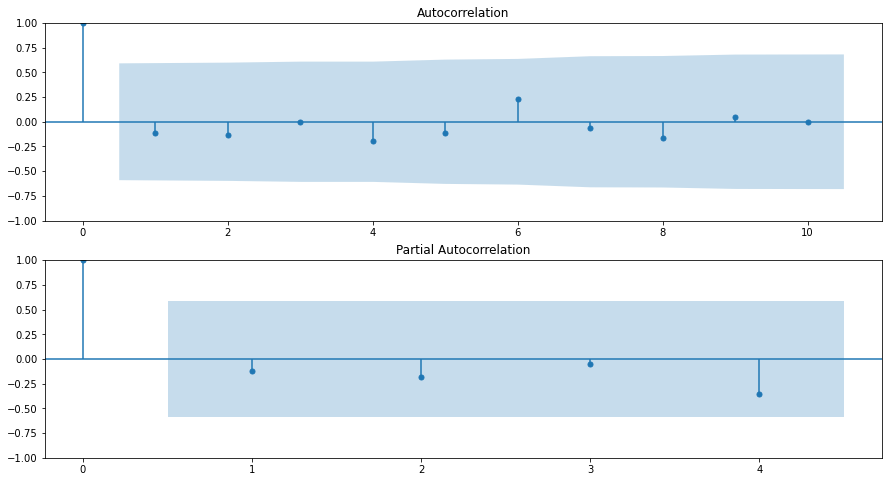

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
plot_acf(crime_a_ts_diff, ax=ax[0], lags=10)
plot_pacf(crime_a_ts_diff, ax=ax[1], lags=4)
plt.show()

From the above ACF and PACF, q=3 and p=3

In [41]:
model_a = ARIMA(crime_a_ts_diff, order=(3, 1, 3))
model_fit_a = model_a.fit()

# make predictions for the next 6 months
forecast_a = model_fit_a.forecast(steps=6)

# print the forecasted values
print(forecast_a)

2021-01-01   -4.830187
2021-02-01   -5.826076
2021-03-01    5.628507
2021-04-01   -0.782208
2021-05-01   -3.424061
2021-06-01    4.889540
Freq: MS, Name: predicted_mean, dtype: float64


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
crime_a_ts_diff.values

array([ -4.,  41.,  -5.,  -6.,  -5., -13.,  -7.,  10.,  -3.,  -9.,   2.])

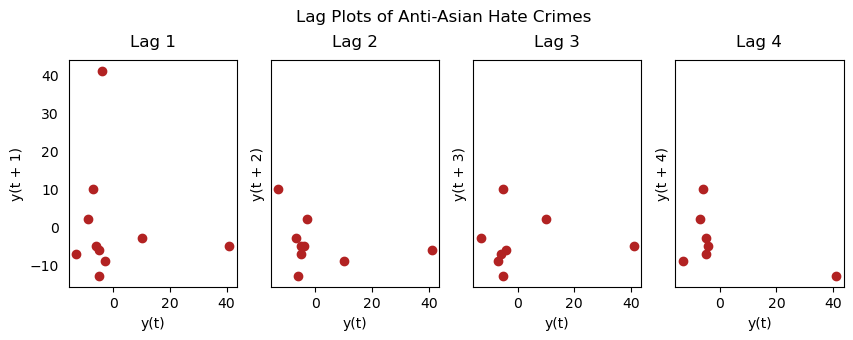

In [51]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Convert the NumPy array to a pandas Series
crime_a_ts_diff_series = pd.Series(crime_a_ts_diff)

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(crime_a_ts_diff_series, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Anti-Asian Hate Crimes', y=1.05)    
plt.show()

From the above graph there is no pattern with different lag values, sp the series is likely to be random white noise.

## Granger Causality for Twitter Dataset and Hate Crime Dataset

### 1. Load in Twitter and Google Time Series and Prepare for the Test

In [52]:
tweets_ts = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/tweets_ts.csv', index_col=0, parse_dates=True)
neg_tweets_ts = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/neg_tweets_ts.csv', index_col=0, parse_dates=True)

In [58]:
processed_google_df = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/processed_google_df.csv')

In [53]:
from statsmodels.tsa.stattools import grangercausalitytests

maximum lag: In general, a good starting point is to set the maximum lag order to a small number, such as 3, and then gradually increase it until the model's performance no longer improves.

In [54]:
# Difference both of my twitter time series objects so that they match Google and hate crime datasets
tweets_ts_diff = tweets_ts.diff().dropna()
neg_tweets_ts_diff = neg_tweets_ts.diff().dropna()

### 2. Granger causality test

<b>2.1 Examine the causal relationship between tweets_ts_diff and crime_a_ts_diff</b>

2.1.1. Check if the number of cleaned tweets has a causal impact on the number of anti-Asian hate crimes

In [70]:
gc_res1 = grangercausalitytests(np.column_stack((tweets_ts_diff, crime_a_ts_diff)), maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1336  , p=0.3224  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=1.6194  , p=0.2032  , df=1
likelihood ratio test: chi2=1.5009  , p=0.2205  , df=1
parameter F test:         F=1.1336  , p=0.3224  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1344  , p=0.4071  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=5.1049  , p=0.0779  , df=2
likelihood ratio test: chi2=4.0437  , p=0.1324  , df=2
parameter F test:         F=1.1344  , p=0.4071  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=33.7645 , p=0.1257  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=810.3478, p=0.0000  , df=3
likelihood ratio test: chi2=37.0228 , p=0.0000  , df=3
parameter F test:         F=33.7645 , p=0.1257  , df_denom=1, df_num=3


Looking at the results, the p-values for all tests are greater than 0.05 at maxlag=1 and maxlag=2, indicating that we cannot reject the null hypothesis of no Granger causality between tweets_ts_diff and crime_a_ts_diff at these lag values. However, at maxlag=3, the p-values are less than 0.05 for all tests except for the ssr-based F-test, suggesting that there may be Granger causality between the two time series at a lag of 3, i.e., the cleaned Twitter time series affect the anti-Asian hate crimes at a delay of three time periods

2.1.2. Check if the number of anti-Asian hate crimes has a causal impact on the number of cleaned tweets

In [71]:
gc_res2 = grangercausalitytests(np.column_stack((crime_a_ts_diff, tweets_ts_diff)), maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6488  , p=0.0977  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=5.2125  , p=0.0224  , df=1
likelihood ratio test: chi2=4.1953  , p=0.0405  , df=1
parameter F test:         F=3.6488  , p=0.0977  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1750  , p=0.3968  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=5.2874  , p=0.0711  , df=2
likelihood ratio test: chi2=4.1594  , p=0.1250  , df=2
parameter F test:         F=1.1750  , p=0.3968  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7551  , p=0.6668  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=18.1229 , p=0.0004  , df=3
likelihood ratio test: chi2=9.4670  , p=0.0237  , df=3
parameter F test:         F=0.7551  , p=0.6668  , df_denom=1, df_num=3


- At a lag of 1, the p-value for the chi-squared test is 0.0224, which is less than the significance level of 0.05, suggesting that there is evidence of Granger causality from tweets_ts_diff to crime_a_ts_diff at a lag of 1. The likelihood ratio test also suggests the same.

- At a lag of 2, neither the F-test nor the chi-squared test has a p-value less than the significance level of 0.05, indicating no evidence of Granger causality.

- At a lag of 3, the p-value for the chi-squared test is 0.0004, which is less than the significance level of 0.05, suggesting that there is evidence of Granger causality from tweets_ts_diff to crime_a_ts_diff

<b>2.2 Examine the causal relationship between neg_tweets_ts_diff and crime_a_ts_diff</b>

2.2.1. Check if the number of cleaned & negative tweets has a causal impact on the number of anti-Asian hate crimes

In [72]:
gc_res3 = grangercausalitytests(np.column_stack((neg_tweets_ts_diff, crime_a_ts_diff)), maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3548  , p=0.5702  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=0.5068  , p=0.4765  , df=1
likelihood ratio test: chi2=0.4944  , p=0.4820  , df=1
parameter F test:         F=0.3548  , p=0.5702  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2192  , p=0.2247  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=9.9864  , p=0.0068  , df=2
likelihood ratio test: chi2=6.7185  , p=0.0348  , df=2
parameter F test:         F=2.2192  , p=0.2247  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=19.8015 , p=0.1634  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=475.2362, p=0.0000  , df=3
likelihood ratio test: chi2=32.8085 , p=0.0000  , df=3
parameter F test:         F=19.8015 , p=0.1634  , df_denom=1, df_num=3


- At a lag of 1, the p-values are all greater than 0.05, which means that there is no statistically significant evidence of Granger causality.

- At a lag of 2, the p-value for the chi-squared test is less than 0.05, which suggests that there is statistically significant evidence of Granger causality from crime_a_ts_diff to neg_tweets_ts_diff.

- At a lag of 3, the p-value for the ssr-based F-test is greater than 0.05, which means that there is no statistically significant evidence of Granger causality. However, the p-value for the chi-squared test and the likelihood ratio test is less than 0.05, suggesting that there may be Granger causality from crime_a_ts_diff to neg_tweets_ts_diff.

2.2.2. Check if the number of anti-Asian hate crimes has a causal impact on the number of cleaned & negative tweets

In [73]:
gc_res4 = grangercausalitytests(np.column_stack((crime_a_ts_diff, neg_tweets_ts_diff)), maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1130  , p=0.1210  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=4.4472  , p=0.0350  , df=1
likelihood ratio test: chi2=3.6792  , p=0.0551  , df=1
parameter F test:         F=3.1130  , p=0.1210  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3271  , p=0.1410  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=14.9721 , p=0.0006  , df=2
likelihood ratio test: chi2=8.8170  , p=0.0122  , df=2
parameter F test:         F=3.3271  , p=0.1410  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8860  , p=0.6340  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=21.2650 , p=0.0001  , df=3
likelihood ratio test: chi2=10.3756 , p=0.0156  , df=3
parameter F test:         F=0.8860  , p=0.6340  , df_denom=1, df_num=3


- At lag 1, negative tweets do not Granger cause crime at 95% confidence level, since the p-value of the F-test is 0.1210. However, the p-value of the chi2 test is 0.0350, which means that negative tweets have a statistically significant impact on crime at lag 1.

- At lag 2, the results show that negative tweets do not Granger cause crime at a 95% confidence level since the p-value of the F-test is 0.1410. However, the p-value of the chi2 test is 0.0006, which means that negative tweets have a statistically significant impact on crime at lag 2.

- At lag 3, the results show that negative tweets do not Granger cause crime at a 95% confidence level, as the p-value of the F-test is 0.6340, which is not statistically significant.

- In conclusion, the results suggest that negative tweets have a statistically significant impact on crime at lag 1 and lag 2

<b>2.3 Examine the causal relationship between tweets_ts_diff and processed_google_df</b>

2.3.1. Check if the number of cleaned tweets has a causal impact on the trend of sinophobic google searches

In [74]:
gc_res5 = grangercausalitytests(np.column_stack((tweets_ts_diff, processed_google_df)), maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2187  , p=0.1800  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=3.1695  , p=0.0750  , df=1
likelihood ratio test: chi2=2.7532  , p=0.0971  , df=1
parameter F test:         F=2.2187  , p=0.1800  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7139  , p=0.2900  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=7.7128  , p=0.0211  , df=2
likelihood ratio test: chi2=5.5705  , p=0.0617  , df=2
parameter F test:         F=1.7139  , p=0.2900  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.4947  , p=0.2332  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=227.8738, p=0.0000  , df=3
likelihood ratio test: chi2=27.0708 , p=0.0000  , df=3
parameter F test:         F=9.4947  , p=0.2332  , df_denom=1, df_num=3


-  At lag 1, there is no evidence of Granger causality between the tweets_ts_diff, processed_google_df

- At lag 2, the chi-squared test indicates that there is evidence of Granger causality at the 0.05 significance level between 2 time series

- At lag 3, there is strong evidence of Granger causality from ssr based chi2 test and likelihood ratio test

- Overall, the results suggest some evidence of Granger causality at lag 2 and strong evidence of Granger causality at lag 3.

2.3.2. Check if  the trend of sinophobic google searches has a causal impact on the number of cleaned tweets

In [75]:
gc_res6 = grangercausalitytests(np.column_stack((processed_google_df, tweets_ts_diff)), maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6507  , p=0.0680  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=6.6438  , p=0.0099  , df=1
likelihood ratio test: chi2=5.0945  , p=0.0240  , df=1
parameter F test:         F=4.6507  , p=0.0680  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0111  , p=0.2486  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=9.0501  , p=0.0108  , df=2
likelihood ratio test: chi2=6.2633  , p=0.0436  , df=2
parameter F test:         F=2.0111  , p=0.2486  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2796  , p=0.8450  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=6.7112  , p=0.0817  , df=3
likelihood ratio test: chi2=4.8734  , p=0.1813  , df=3
parameter F test:         F=0.2796  , p=0.8450  , df_denom=1, df_num=3


- At lag 1 and 2, the chi-squared test shows evidence of Granger causality at the 0.01 significance level, but the other tests do not provide strong evidence of Granger causality.

- Overall, the results suggest some evidence of Granger causality at lags 1 and 2, but not at lag 3. However, the evidence is not strong, as the F-tests do not provide significant results at the conventional 0.05 level, except for the chi-squared test in lags 1 and 2. 

<b>2.4 Examine the causal relationship between neg_tweets_ts_diff and processed_google_df</b>

2.4.1. Check if the number of cleaned & negative tweets has a causal impact on the trend of sinophobic google searches

In [76]:
gc_res7 = grangercausalitytests(np.column_stack((neg_tweets_ts_diff, processed_google_df)), maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0688  , p=0.1233  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=4.3841  , p=0.0363  , df=1
likelihood ratio test: chi2=3.6354  , p=0.0566  , df=1
parameter F test:         F=3.0688  , p=0.1233  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3499  , p=0.0992  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=19.5744 , p=0.0001  , df=2
likelihood ratio test: chi2=10.3976 , p=0.0055  , df=2
parameter F test:         F=4.3499  , p=0.0992  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=14.6951 , p=0.1889  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=352.6813, p=0.0000  , df=3
likelihood ratio test: chi2=30.4684 , p=0.0000  , df=3
parameter F test:         F=14.6951 , p=0.1889  , df_denom=1, df_num=3


- At lag 1, there are some weak evidence of Granger causality as the p-value for the ssr-based chi2 test is below the significance level of 0.05, and the likelihood ratio test has a p-value close to 0.05. However, the p-value for the ssr-based F test and parameter F test are greater than 0.05, indicating that the evidence is not strong enough.

- At lag 2, there is stronger evidence of Granger causality at lag 2, as indicated by the significant p-values for both the ssr-based chi2 test and the likelihood ratio test, and a relatively low p-value for the ssr-based F test.

- At lag 3, there is no evidence of Granger causality

2.4.2. Check if the trend of sinophobic google searches has a causal impact on the number of cleaned & negative tweets

In [77]:
gc_res8 = grangercausalitytests(np.column_stack((processed_google_df, neg_tweets_ts_diff)), maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5082  , p=0.1032  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=5.0117  , p=0.0252  , df=1
likelihood ratio test: chi2=4.0624  , p=0.0438  , df=1
parameter F test:         F=3.5082  , p=0.1032  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3063  , p=0.2157  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=10.3782 , p=0.0056  , df=2
likelihood ratio test: chi2=6.9023  , p=0.0317  , df=2
parameter F test:         F=2.3063  , p=0.2157  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0537  , p=0.9771  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=1.2881  , p=0.7320  , df=3
likelihood ratio test: chi2=1.1943  , p=0.7544  , df=3
parameter F test:         F=0.0537  , p=0.9771  , df_denom=1, df_num=3


- At lag 1 and 2, ssr based chi2 test and likelihood ratio test show significance, meaning there can be Granger causality of processed_google_df on neg_tweets_ts_diff

- There is no evidence of Granger Causality at lag 3

<b>2.5 Examine the causal relationship between crime_a_ts_diff and processed_google_df</b>

2.5.1 Check if the number of anti-Asian hate crimes has a causal impact on the pattern of sinophobic google search

In [78]:
gc_res9 = grangercausalitytests(np.column_stack((crime_a_ts_diff, processed_google_df)), maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8557  , p=0.3857  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=1.2224  , p=0.2689  , df=1
likelihood ratio test: chi2=1.1532  , p=0.2829  , df=1
parameter F test:         F=0.8557  , p=0.3857  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9157  , p=0.4705  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=4.1207  , p=0.1274  , df=2
likelihood ratio test: chi2=3.3927  , p=0.1833  , df=2
parameter F test:         F=0.9157  , p=0.4705  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0828  , p=0.5926  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=25.9875 , p=0.0000  , df=3
likelihood ratio test: chi2=11.5724 , p=0.0090  , df=3
parameter F test:         F=1.0828  , p=0.5926  , df_denom=1, df_num=3


- Only at lag 3, we see some evidence of Granger Causality on ssr based F test and ssr based chi2 test

2.5.2 Check if the pattern of sinophobic google search has a causal impact on the number of anti-Asian hate crimes

In [79]:
gc_res10 = grangercausalitytests(np.column_stack((processed_google_df, crime_a_ts_diff)), maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3848  , p=0.0745  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=6.2640  , p=0.0123  , df=1
likelihood ratio test: chi2=4.8637  , p=0.0274  , df=1
parameter F test:         F=4.3848  , p=0.0745  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.7314  , p=0.0347  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=39.2915 , p=0.0000  , df=2
likelihood ratio test: chi2=15.1203 , p=0.0005  , df=2
parameter F test:         F=8.7314  , p=0.0347  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=35.7995 , p=0.1221  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=859.1872, p=0.0000  , df=3
likelihood ratio test: chi2=37.4865 , p=0.0000  , df=3
parameter F test:         F=35.7995 , p=0.1221  , df_denom=1, df_num=3


- At lag 1, the test shows an F statistic of 4.3848 and a p-value of 0.0745. This suggests that there is some evidence of Granger causality between the two series at lag 1, and significant result for ssr based chi2 test and likelihood ratio test

- At lag 2, we see strong evidence of Granger Causality based on all tests

- At lag 3, we also see strong evidence on Granger Causality from ssr based chi2 test and likelihood ratio test

In [81]:
variables = ['Tweets vs Crime', 'Crimes vs Tweets', 'Neg_tweets vs Crimes', 'Crimes vs Neg_tweets', 
             'Tweets vs Google_search', 'Google_search vs Tweets', 'Neg_tweets vs Google_search', 'Google_search vs Neg_tweets',
             'Crimes vs Google_search', 'Google_search vs Crimes']

ssr_based_F_1 = [0.3224, 0.0977, 0.5702, 0.1210, 0.1800, 0.0680, 0.1233, 0.1032, 0.3857, 0.0745]
ssr_based_chi2_1 = [0.2032, 0.0224, 0.4765, 0.0350, 0.0750, 0.0099, 0.0363, 0.0252, 0.2689, 0.0123]
likelihood_ratio_1 = [0.2205, 0.0405, 0.4820, 0.0551, 0.0971, 0.0240, 0.0566, 0.0438, 0.2829, 0.0274]

ssr_based_F_2 = [0.4071, 0.3968, 0.2247, 0.1410, 0.2900, 0.2486, 0.0992, 0.2157, 0.4705, 0.0347]
ssr_based_chi2_2 = [0.0779, 0.0711, 0.0068, 0.0006, 0.0211, 0.0108, 0.0001, 0.0056, 0.1274, 0.0000]
likelihood_ratio_2 = [0.1324, 0.1250, 0.0348, 0.0122, 0.0617, 0.0436, 0.0055, 0.0317, 0.1833, 0.0005]

ssr_based_F_3 = [0.1257, 0.6668, 0.1634, 0.6340, 0.2332, 0.8450, 0.1889, 0.9771, 0.5926, 0.1221]
ssr_based_chi2_3 = [0.0000, 0.0004, 0.0000, 0.0001, 0.0000, 0.0817, 0.0000, 0.7320, 0.0000, 0.0000]
likelihood_ratio_3 = [0.0000, 0.0237, 0.0000, 0.0156, 0.0000, 0.1813, 0.0000, 0.7544, 0.0090,0.0000]

In [82]:
gt_df = pd.DataFrame({'Comparison': variables, 'lag 1 ssr based F': ssr_based_F_1, 'lag 1 ssr based chi2': ssr_based_chi2_1, 'lag 1 likelihood ratio': likelihood_ratio_1,
                   'lag 2 ssr based F': ssr_based_F_2, 'lag 2 ssr based chi2': ssr_based_chi2_2, 'lag 2 likelihood ratio': likelihood_ratio_2,
                   'lag 3 ssr based F': ssr_based_F_3, 'lag 3 ssr based chi2': ssr_based_chi2_3, 'lag 3 likelihood ratio': likelihood_ratio_3})
gt_df

,Comparison,lag 1 ssr based F,lag 1 ssr based chi2,lag 1 likelihood ratio,lag 2 ssr based F,lag 2 ssr based chi2,lag 2 likelihood ratio,lag 3 ssr based F,lag 3 ssr based chi2,lag 3 likelihood ratio
0,Tweets vs Crime,0.3224,0.2032,0.2205,0.4071,0.0779,0.1324,0.1257,0.0000,0.0000
1,Crimes vs Tweets,0.0977,0.0224,0.0405,0.3968,0.0711,0.1250,0.6668,0.0004,0.0237
2,Neg_tweets vs Crimes,0.5702,0.4765,0.4820,0.2247,0.0068,0.0348,0.1634,0.0000,0.0000
3,Crimes vs Neg_tweets,0.1210,0.0350,0.0551,0.1410,0.0006,0.0122,0.6340,0.0001,0.0156
4,Tweets vs Google_search,0.1800,0.0750,0.0971,0.2900,0.0211,0.0617,0.2332,0.0000,0.0000
5,Google_search vs Tweets,0.0680,0.0099,0.0240,0.2486,0.0108,0.0436,0.8450,0.0817,0.1813
6,Neg_tweets vs Google_search,0.1233,0.0363,0.0566,0.0992,0.0001,0.0055,0.1889,0.0000,0.0000
7,Google_search vs Neg_tweets,0.1032,0.0252,0.0438,0.2157,0.0056,0.0317,0.9771,0.7320,0.7544
8,Crimes vs Google_search,0.3857,0.2689,0.2829,0.4705,0.1274,0.1833,0.5926,0.0000,0.0090
9,Google_search vs Crimes,0.0745,0.0123,0.0274,0.0347,0.0000,0.0005,0.1221,0.0000,0.0000


In [21]:
df_monthly = df.resample('M').sum()
rolling_avg = df_monthly.rolling(window=3).mean()
print(rolling_avg)


                incident_id      data_year  adult_victim_count  \
incident_date                                                    
2020-01-31              NaN            NaN                 NaN   
2020-02-29              NaN            NaN                 NaN   
2020-03-31     3.411767e+07   58580.000000           25.333333   
2020-04-30     4.618191e+07   80126.666667           37.333333   
2020-05-31     5.914550e+07  100326.666667           47.333333   
2020-06-30     5.372710e+07   89553.333333           43.000000   
2020-07-31     4.547663e+07   73393.333333           34.333333   
2020-08-31     3.513431e+07   56560.000000           27.666667   
2020-09-30     3.192197e+07   49826.666667           26.666667   
2020-10-31     3.251004e+07   49826.666667           26.000000   
2020-11-30     3.225127e+07   48480.000000           29.000000   
2020-12-31     2.778926e+07   41746.666667           22.666667   

               juvenile_victim_count  total_offender_count  \
incident_date

### Conduct some basic time series analysis

<b>Rolling mean:</b> aka moving average, a method of smoothing out fluctuations in a time series by calculating the average of a sliding window of observations over time. By taking the mean of a window of observations, it can help to reduce the effect of random noise and highlight underlying trends or changes in the data. Rolling means are useful for identifying short-term changes in the data

<b>Trend analysis:</b> a method of decomposing a time series into its underlying trend, cycle, and random components. It aims to identify the long-term direction or tendency of the data, ignoring the short-term fluctuations and noise.


In [22]:
import statsmodels.api as sm

# Convert the list to a Pandas DataFrame with a DatetimeIndex
dates = pd.date_range(start='2020-01-01', end='2020-12-01', freq='MS')
df = pd.DataFrame({'hate_crimes': crime_num}, index=dates)

# Calculate a rolling mean with a window size of 3
rolling_mean = df['hate_crimes'].rolling(window=3).mean()

# Perform a trend analysis using a Hodrick-Prescott filter
cycle, trend = sm.tsa.filters.hpfilter(df['hate_crimes'], lamb=1600)

print("Rolling Mean:\n", rolling_mean)
print("\nTrend Analysis:\n", trend)

Rolling Mean:
 2020-01-01          NaN
2020-02-01          NaN
2020-03-01    29.000000
2020-04-01    39.666667
2020-05-01    49.666667
2020-06-01    44.333333
2020-07-01    36.333333
2020-08-01    28.000000
2020-09-01    24.666667
2020-10-01    24.666667
2020-11-01    24.000000
2020-12-01    20.666667
Freq: MS, Name: hate_crimes, dtype: float64

Trend Analysis:
 2020-01-01    36.246475
2020-02-01    35.155348
2020-03-01    34.052817
2020-04-01    32.914256
2020-05-01    31.728130
2020-06-01    30.493585
2020-07-01    29.217434
2020-08-01    27.911808
2020-09-01    26.586828
2020-10-01    25.247043
2020-11-01    23.898512
2020-12-01    22.547764
Freq: MS, Name: hate_crimes_trend, dtype: float64


<i><b>Rolling Means:</b></i>

From the rolling means, we can see that the average number of hate crimes per month increased from March to May (29 to 49.67), indicating a potential spike in hate crimes during that period. However, the rolling mean decreased from May to June (49.67 to 44.33), suggesting that the number of hate crimes may have decreased in June. The rolling mean then decreased further from June to July (44.33 to 36.33) and continued to decrease gradually until December (20.67), indicating a general downward trend in the number of hate crimes.

<i><b>Trend Analysis:</b></i>

The trend analysis shows that the number of hate crimes per month decreased from January (36.25) to December (22.55), suggesting a general downward trend in the number of hate crimes throughout the year. The negative trend value (-1.69) indicates that the time series data is decreasing over time.

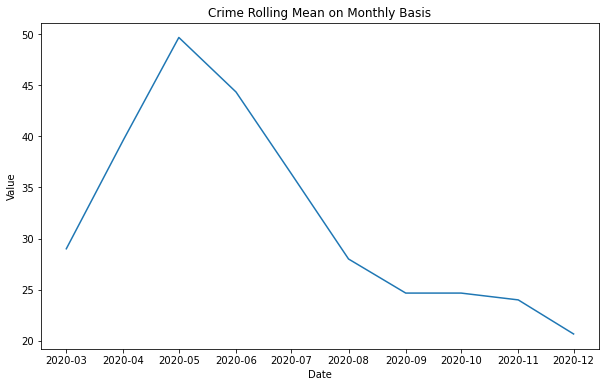

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(rolling_mean.index, rolling_mean.values)
plt.title("Crime Rolling Mean on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()